Задача 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab, gridspec
from collections import Counter

train = pd.read_csv('/Users/Hoderu/train.csv')
# Basic train dataset contains: 42 000 examples
# It will take too long to processs this data during the class
# Black Magic
train = train[:1000]
X_train = np.asarray(train[list(range(1,785))])
Y_train = np.asarray(train[[0]]).ravel()

In [2]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier(algorithm='ball_tree')

def get_score(cv_strategy):
    result = 0;
    for train_indices, test_indices in cv_strategy:
        estimator.fit(X_train[train_indices], Y_train[train_indices])
        result += estimator.score(X_train[test_indices], Y_train[test_indices])
    return result

In [3]:
from sklearn.cross_validation import ShuffleSplit

def get_partition(test_amount):
    n = len(X_train)
    strategy = KFold(n, n_folds = n / test_amount)
    return get_score(strategy) / len(strategy)

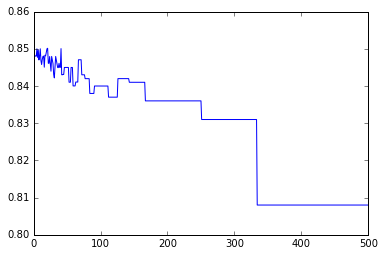

In [4]:
%matplotlib inline

from matplotlib import pyplot
import numpy as np

ratios = np.arange(1, len(X_train) / 2)
results = [get_partition(ratio) for ratio in ratios]
pyplot.plot(ratios, results)
pyplot.show()

## Задача 2

Регрессивная функция штрафа $L(y, \hat{y}) = (y-\hat{y})^2$. Докажем формулы $bias^2$ и $variance$ для следующих моделей.

$\hat{y_1}=\frac{1}{l}\sum\limits_{i=1}^{l}y_i$

$bias^2\{\hat{y_1}\}$ = $(\mathsf{E}y-\mathsf{E}\hat{y_1})^2$ = |подставляем модель| = $(\mathsf{E}y-\mathsf{E}(\frac{1}{l}\sum\limits_{i=1}^{l}y_i))^2$ = |все $y_i$ распределены одинаково| = $(Ey-\frac{1}{l} \cdot l \cdot \mathsf{E}y)^2$ = $(Ey - Ey)^2$ = 0

$var_{LS}\{\hat{y_1}\}$ = $var_{LS}(\frac{1}{l}\sum\limits_{i=1}^{l}y_i)$ = $\frac{1}{l^2}var_{LS}(\sum\limits_{i=1}^{l}y_i)$ = $\frac{1}{l^2}\sum\limits_{i=1}^{l}var_{LS}y_i$ = $\frac{1}{l^2} \cdot l \cdot var_{Y}y$ = $\frac{1}{l}var_{Y}y$ = $\frac{1}{l}var_{Y}{y}$


Вторая модель:

$\hat{y_2}=\frac{\lambda \cdot 180 + \sum_{i=1}^{l}y_i}{\lambda + l}$

$bias^2\{\hat{y_2}\}$ = $(\mathsf{E}y-\mathsf{E}\hat{y_2})^2$ = |подставляем модель| = $(\mathsf{E}y$ - $\mathsf{E}\frac{\lambda \cdot 180 + \sum_{i=1}^{l}y_i}{\lambda + l})^2$ = $(\mathsf{E}y$ - $\frac{180\lambda}{\lambda + l} - \frac{l\mathsf{E}y}{\lambda + l})^2$ = $(\frac{\lambda\mathsf{E}y - 180\lambda}{\lambda + l})^2$ = $(\frac{\lambda}{\lambda + l})^2(\mathsf{E}y - 180)^2$ = $\left(\frac{\lambda}{\lambda + l}\right)^2 (\mathsf{E}_{Y}\{y\} - 180)^2 $

$var_{LS}\{\hat{y_2}\}$ = $var_{LS}\frac{\lambda \cdot 180 + \sum_{i=1}^{l}y_i}{\lambda + l}$ = $\frac{1}{(\lambda + l)^2}\sum\limits_{i=1}^{l}var_{LS}{y_i}$ = $\frac{l}{(\lambda + l)^2} var_Yy$ = $\frac{l}{(\lambda + l)^2} var_Yy$

Нужно описать ситуацию, когда вторая модель окажется точнее первой, это так, если выполнено неравенство: $bias^2\{\hat{y_2}\}$ + $var_{LS}\{\hat{y_2}\}$ <= $bias^2\{\hat{y_1}\}$ + $var_{LS}\{\hat{y_1}\}$. Например при 𝖤y=180.